## 🌳🕵🏽 **Taller: Árboles de decisión y bosque aleatorio**

**Dataset** - Telecom Customer Churn (2023): https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset

**Objetivo:** El objetivo principal es identificar los factores que influyen en la pérdida de clientes y evaluar la capacidad predictiva de los modelos de _árbol de decisión_  y _bosque aleatorio_ aplicado a los datos de clientes de una empresa de telecomunicaciones.

### **Paso 1:** Carga y limpieza inicial

In [1]:
import pandas as pd

# Leer el dataset
df_churn = pd.read_excel("data_churn.xlsx")

In [2]:
# Explorar los registros del dataset
df_churn.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
# Traducir el encabezado del dataset
df_churn.columns = ['ID de cliente', 'Recuento', 'País', 'Estado', 'Ciudad', 'Código postal',
'Latitud y longitud', 'Latitud', 'Longitud', 'Género', 'Personal de la tercera edad',
'Pareja', 'Dependientes', 'Meses de antigüedad', 'Servicio telefónico',
'Varias líneas', 'Servicio de internet', 'Seguridad en línea',
'Copia de seguridad en línea', 'Protección del dispositivo', 'Soporte técnico', 'TV en streaming',
'Películas en streaming', 'Contrato', 'Facturación electrónica', 'Método de pago',
'Cargos mensuales', 'Cargos totales', 'Etiqueta de abandono', 'Valor de abandono',
'Puntuación de abandono', 'CLTV', 'Motivo de abandono']

In [4]:
# Mostrar número de valores nulos por columnas
nulos = df_churn.isnull().sum()
print("Numero de faltantes:\n",nulos)

Numero de faltantes:
 ID de cliente                     0
Recuento                          0
País                              0
Estado                            0
Ciudad                            0
Código postal                     0
Latitud y longitud                0
Latitud                           0
Longitud                          0
Género                            0
Personal de la tercera edad       0
Pareja                            0
Dependientes                      0
Meses de antigüedad               0
Servicio telefónico               0
Varias líneas                     0
Servicio de internet              0
Seguridad en línea                0
Copia de seguridad en línea       0
Protección del dispositivo        0
Soporte técnico                   0
TV en streaming                   0
Películas en streaming            0
Contrato                          0
Facturación electrónica           0
Método de pago                    0
Cargos mensuales                  0
Cargos

In [5]:
# Mostrar si existen duplicados 
duplicados = df_churn.duplicated().sum()
print(f"Hay {duplicados} duplicados en la base de datos")

Hay 0 duplicados en la base de datos


In [6]:
# Verificar los tipos de datos
df_churn.dtypes

ID de cliente                   object
Recuento                         int64
País                            object
Estado                          object
Ciudad                          object
Código postal                    int64
Latitud y longitud              object
Latitud                        float64
Longitud                       float64
Género                          object
Personal de la tercera edad     object
Pareja                          object
Dependientes                    object
Meses de antigüedad              int64
Servicio telefónico             object
Varias líneas                   object
Servicio de internet            object
Seguridad en línea              object
Copia de seguridad en línea     object
Protección del dispositivo      object
Soporte técnico                 object
TV en streaming                 object
Películas en streaming          object
Contrato                        object
Facturación electrónica         object
Método de pago           

In [7]:
# Puesto que la columna 'Cargos totales' representa valores numéricos se aplica la conversión a este formato
df_churn['Cargos totales'] = pd.to_numeric(df_churn['Cargos totales'], errors='coerce')

In [8]:
# Verificar la conversión
df_churn['Cargos totales'].dtypes

dtype('float64')

In [9]:
# Eliminar las columnas irrelevantes para los modelos
df_churn.drop(columns = ['ID de cliente', 'Recuento', 'País', 'Estado', 'Ciudad', 'Código postal',
'Latitud y longitud', 'Latitud', 'Longitud', 'Etiqueta de abandono',
'Puntuación de abandono', 'CLTV', 'Motivo de abandono'
], inplace = True)

In [10]:
# Mostrar las columnas finales
df_churn.columns

Index(['Género', 'Personal de la tercera edad', 'Pareja', 'Dependientes',
       'Meses de antigüedad', 'Servicio telefónico', 'Varias líneas',
       'Servicio de internet', 'Seguridad en línea',
       'Copia de seguridad en línea', 'Protección del dispositivo',
       'Soporte técnico', 'TV en streaming', 'Películas en streaming',
       'Contrato', 'Facturación electrónica', 'Método de pago',
       'Cargos mensuales', 'Cargos totales', 'Valor de abandono'],
      dtype='object')

Desde una perspectiva de **preprocesamiento** y simplificación de variables categóricas para Machine Learning se determina reemplazar los campos "No internet service", porque si el cliente no tiene servicio de internet, entonces todas las opciones relacionadas con internet (seguridad, respaldo, soporte, etc.) deben ser necesariamente 'No' para efectos de predicción. Es decir, se **reemplaza** "No internet service" por "No" con el método `replace()`. Esto simplifica el modelo, reduce la dimensionalidad y hace más claro el análisis.

In [11]:
# CASO 1: Lista de columnas relacionadas con servicios de internet
cols_internet = [
    'Varias líneas',
    'Seguridad en línea',
    'Copia de seguridad en línea',
    'Protección del dispositivo',
    'Soporte técnico',
    'TV en streaming',
    'Películas en streaming',
]

# Reemplazar "No internet service" por "No" en esas columnas
for col in cols_internet:
    df_churn[col] = df_churn[col].replace('No internet service', 'No')

# CASO 2: Servicio de 'Varias Líneas'
df_churn['Varias líneas'] = df_churn['Varias líneas'].replace('No phone service', 'No')



**Conclusiones:**
- La base de datos no tiene duplicados.
- Se ajustaron los formatos de las columnas y se eliminaron las que son innecesarias para el entrenamiento del modelo.
- Hay valores faltantes, en el siguiente paso se les da tratamiento.
- Se decide **reemplazar** "No internet service" por "No" en variables relacionadas, ya que representan lo mismo. Esto simplifica el modelo y mejora la calidad del preprocesamiento.

### **Paso 2:** Análisis descriptivo


In [12]:
df_churn.describe()

,Meses de antigüedad,Cargos mensuales,Cargos totales,Valor de abandono
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,0.265370
std,24.559481,30.090047,2266.771362,0.441561
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.850000,3794.737500,1.000000
max,72.000000,118.750000,8684.800000,1.000000


In [13]:
(df_churn['Meses de antigüedad'] == 0).value_counts()

Meses de antigüedad
False    7032
True       11
Name: count, dtype: int64

El método `describe()` muestra estadísticas básicas. Se puede observar que el valor mínimo para la columna **Meses de antigüedad** el valor min. es 0. Si el cliente aparece en la base de datos, debería haber estado al menos 1 mes en la empresa. De 7032 registros solo 11 clientes presentan esta característica, se decide eliminar estos registros.

In [14]:
# Filtrar el dataset con Meses de antigüedad > 0
df_churn = df_churn[df_churn['Meses de antigüedad'] > 0]

In [15]:
# Verificar el filtro
df_churn.describe()

,Meses de antigüedad,Cargos mensuales,Cargos totales,Valor de abandono
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.265785
std,24.545260,30.085974,2266.771362,0.441782
min,1.000000,18.250000,18.800000,0.000000
25%,9.000000,35.587500,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.862500,3794.737500,1.000000
max,72.000000,118.750000,8684.800000,1.000000


In [16]:
# Aplicar bucle for para iterar y mostrar la frecuencia por cada columna categórica
columns_cat = df_churn.select_dtypes(include='object').columns
for col in columns_cat:
    print(f"\nFrecuencia del Feature '{col}':")
    print(df_churn[col].value_counts())
    print('-' * 30)



Frecuencia del Feature 'Género':
Género
Male      3549
Female    3483
Name: count, dtype: int64
------------------------------

Frecuencia del Feature 'Personal de la tercera edad':
Personal de la tercera edad
No     5890
Yes    1142
Name: count, dtype: int64
------------------------------

Frecuencia del Feature 'Pareja':
Pareja
No     3639
Yes    3393
Name: count, dtype: int64
------------------------------

Frecuencia del Feature 'Dependientes':
Dependientes
No     5412
Yes    1620
Name: count, dtype: int64
------------------------------

Frecuencia del Feature 'Servicio telefónico':
Servicio telefónico
Yes    6352
No      680
Name: count, dtype: int64
------------------------------

Frecuencia del Feature 'Varias líneas':
Varias líneas
No     4065
Yes    2967
Name: count, dtype: int64
------------------------------

Frecuencia del Feature 'Servicio de internet':
Servicio de internet
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64
-------------

In [17]:
# Porcentaje de clientes que abandonaron la compañía
porcentaje_abandono = df_churn['Valor de abandono'].value_counts(normalize=True) * 100
print("--- Porcentaje de abandono ---")
print(round(porcentaje_abandono, 2))

--- Porcentaje de abandono ---
Valor de abandono
0    73.42
1    26.58
Name: proportion, dtype: float64


Valor de abandono
0    5163
1    1869
Name: count, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8416\714541160.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Valor de abandono', data = df_churn, palette='coolwarm')


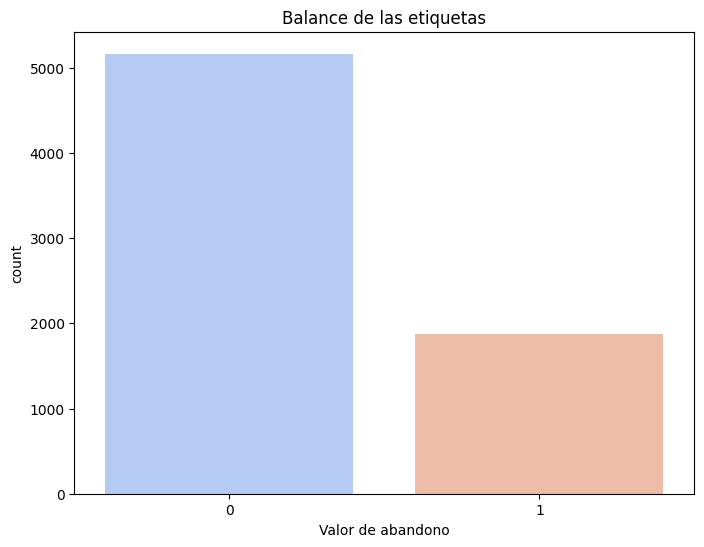

In [18]:
# ¿Existe desbalanceo en la variable objetivo? Veamos:
import matplotlib.pyplot as plt
import seaborn as sns

# Formato de tabla
print(df_churn['Valor de abandono'].value_counts())

# Formato de gráfica
plt.figure(figsize=(8, 6))
sns.countplot(x = 'Valor de abandono', data = df_churn, palette='coolwarm')
plt.title("Balance de las etiquetas")
plt.show()

# 0 = el cliente permaneció en la empresa.
# 1 = el cliente abandonó la empresa.


**Conclusiones:**
- **Desbalance de clases evidente:** existe un desbalance en la variable objetivo, con una menor proporción de clientes que abandonan (aproximadamente 27%).

### **Paso 3:** Análisis de frecuencias y proporciones
- ¿Qué variables demográficas (ej. edad, género) o de contrato (ej. tipo de plan, antigüedad) están más correlacionadas con el abandono de la compañía?

Se hace uso de `counplot()` y `lineplot()`para visualizar la proporción de abandono para algunas categorías de las variables demográficas y de contrato. Esto es muy efectivo para ver si hay una diferencia significativa en la tasa de abandono entre los grupos (ej: ¿Los clientes con cierto tipo de servicio de internet abandonan más?)

Etiquetas de abandono:
0 = el cliente permaneció en la empresa 
1 = el cliente abandonó la empresa.


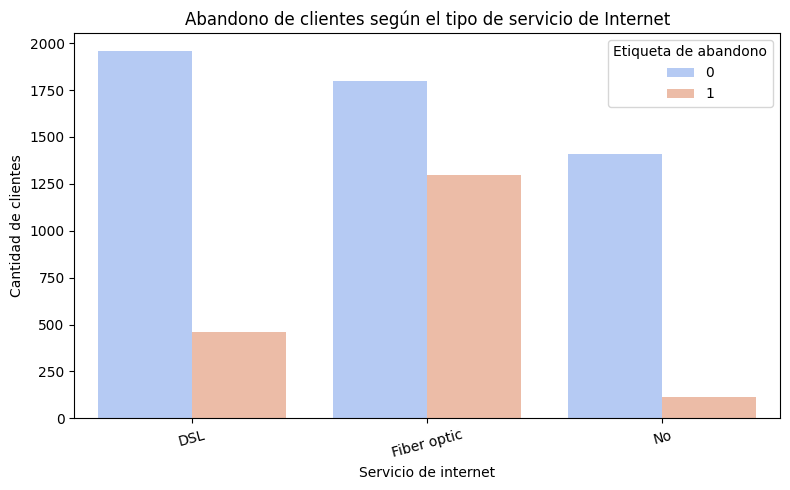

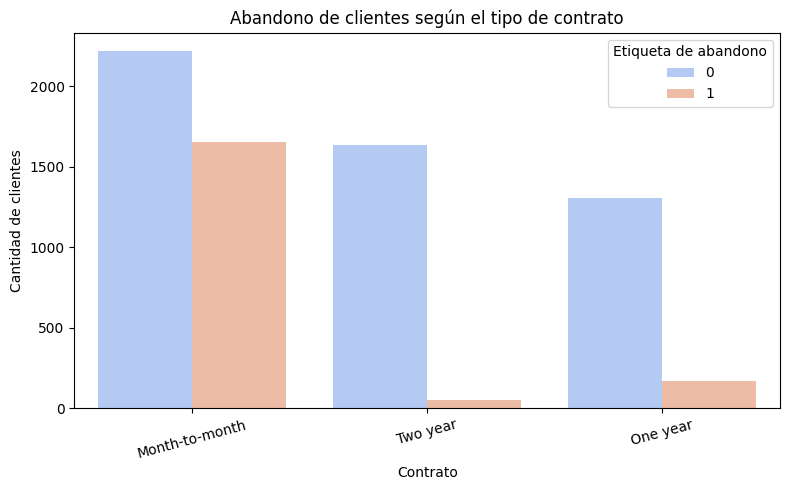

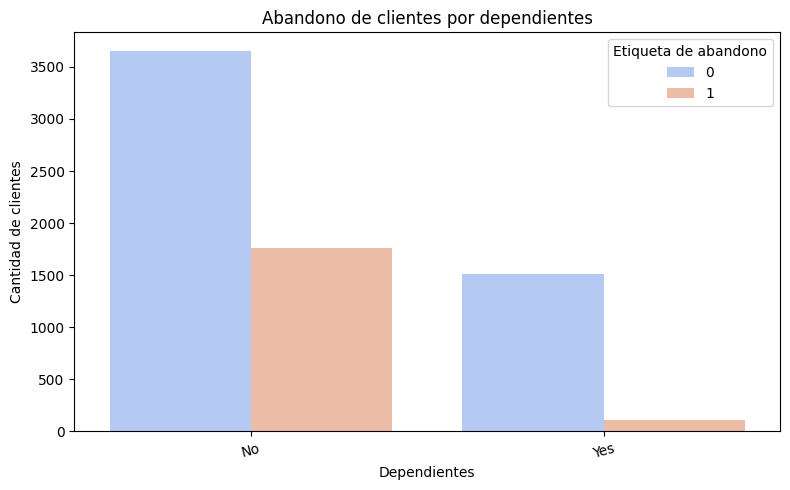

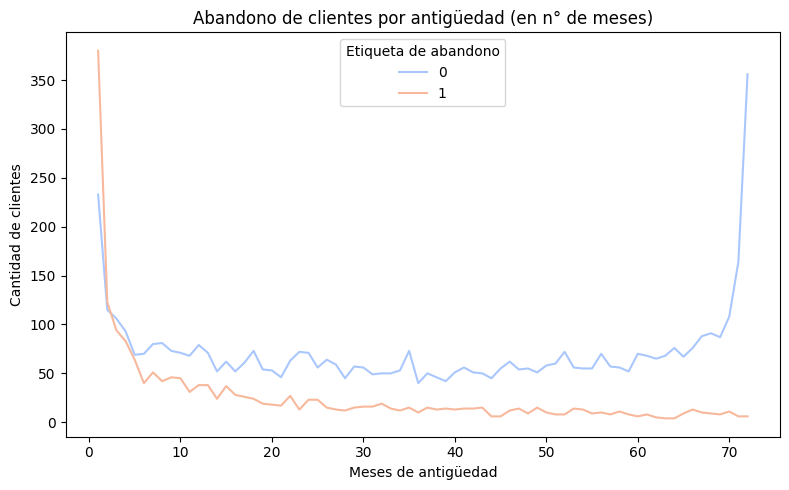

In [19]:
# Lista de variables categóricas para graficar con countplot

categorical_vars = [
    ('Servicio de internet', 'Abandono de clientes según el tipo de servicio de Internet'),
    ('Contrato', 'Abandono de clientes según el tipo de contrato'),
    ('Dependientes', 'Abandono de clientes por dependientes')
]

print("Etiquetas de abandono:\n0 = el cliente permaneció en la empresa \n1 = el cliente abandonó la empresa.")

# Gráficas de barras por cada categoría
for var, title in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=var, hue='Valor de abandono', data=df_churn, palette='coolwarm')
    plt.title(title)
    plt.xlabel(var)
    plt.ylabel("Cantidad de clientes")
    plt.legend(title="Etiqueta de abandono")
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()

# Gráfico de líneas para meses de antigüedad
# Agrupamos para contar clientes por mes de antigüedad y valor de abandono
df_line = df_churn.groupby(['Meses de antigüedad', 'Valor de abandono']).size().reset_index(name='Cantidad')

# Gráfico de líneas
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_line, x='Meses de antigüedad', y='Cantidad', hue='Valor de abandono', palette='coolwarm')
plt.title("Abandono de clientes por antigüedad (en n° de meses)")
plt.xlabel("Meses de antigüedad")
plt.ylabel("Cantidad de clientes")
plt.legend(title="Etiqueta de abandono")
plt.tight_layout()
plt.show()



**Conclusiones:**
- Los clientes con contrato "Month-to-month" son los que más abandonan la compañía.
- Los clientes con servicio de "Fiber optic" también muestran una alta tasa de abandono en comparación con otros tipos de servicio.
- Los clientes más nuevos (baja antigüedad) tienen una probabilidad significativamente mayor de abandonar la compañía.
- Los clientes sin dependientes también muestran una mayor propensión al abandono.

### **Paso 4:** Preprocesamiento

In [20]:
# Librerías necesarias para el entrenamiento de los modelos

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
# Separar los Features de la variable Target
X = df_churn.drop(['Valor de abandono'], axis = 1)
y = df_churn['Valor de abandono']

Para abordar el desequilibrio de la clase se emplea la técnica **submuestreo (undersampling)**. Su principal propósito es reducir el número de instancias de la clase mayoritaria para que el conjunto de datos se vuelva más equilibrado. A continuación, se emplea dicha técnica:

In [22]:
# Concatenar X e y en un DF
df_concat = pd.concat([X, y], axis=1)
target = y.name

In [23]:
# Determinar clase minoritaria y mayoritaria
df_minoritaria = df_churn[df_churn[target] == 1]
df_mayoritaria = df_churn[df_churn[target] == 0]

In [24]:
# Submuestreo
from sklearn.utils import resample
df_mayoritaria_submuestreo = resample(df_mayoritaria, n_samples = 2*len(df_minoritaria), random_state=0)

In [25]:
# Concatenar
df_balanceado = pd.concat([df_mayoritaria_submuestreo, df_minoritaria])

In [26]:
# Actualizar X e y
X_balanceada = df_balanceado.drop(columns=[target])
y_balanceada = df_balanceado[target]

In [27]:
print("Distribución final de la clase:\n", y_balanceada.value_counts())

Distribución final de la clase:
 Valor de abandono
0    3738
1    1869
Name: count, dtype: int64


**Separación de tipos de variables:** categorizar los _features_ en ordinales, categóricas y numéricas. Se hace por varias razones fundamentales que impactan directamente en la preparación de los datos, la elección del modelo y la interpretación de los resultados.

In [28]:
# Codificación One-Hot Encoding
onehot_columns = [
    'Género', 'Personal de la tercera edad', 'Pareja', 'Dependientes',
    'Servicio telefónico', 'Facturación electrónica',
    'Varias líneas', 'Servicio de internet', 'Seguridad en línea',
    'Copia de seguridad en línea', 'Protección del dispositivo',
    'Soporte técnico', 'TV en streaming', 'Películas en streaming',
    'Método de pago'
]

# Codificación Ordinal Encoding
ordinal_columns = ['Contrato']
contract_categories = ['Month-to-month', 'One year', 'Two year'] # El orden importa

# Variables numéricas
numerical_columns = ['Meses de antigüedad', 'Cargos mensuales', 'Cargos totales']

# Aplicación  de ColumnTransformer para transformaciones múltiples.
transformador = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first',handle_unknown='ignore', sparse_output=False), onehot_columns),
        ('ordinal', OrdinalEncoder(categories=[contract_categories], handle_unknown='use_encoded_value', unknown_value=-1), ordinal_columns) # handle_unknown para nuevas categorías
    ],
    remainder='passthrough'
)
X_encoded = pd.DataFrame(transformador.fit_transform(X_balanceada))


In [29]:
# Dividir datos en train (70%) y test (30%) con train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_balanceada, test_size = 0.30, random_state = 0)

### **Paso 5:** Entrenamiento

**🌳 Arbol de decisión**

In [30]:
# Creacion del modelo
tree = DecisionTreeClassifier(max_depth = 3, class_weight='balanced', random_state = 0,)

In [31]:
# Entrenamiento del modelo
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=0)

In [32]:
# Calculo de las predicciones en Train y Test
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [33]:
# Calculo de la exactitud
from sklearn.metrics import accuracy_score

# En Train:
train_accuracy_tree = round(accuracy_score(y_train, y_train_pred_tree), 2)

# En Test:
test_accuracy_tree = round(accuracy_score(y_test, y_test_pred_tree), 2)

# Mostrar métrica:
print('El accuracy en train es:', train_accuracy_tree)
print('El accuracy en test es:', test_accuracy_tree)

El accuracy en train es: 0.77
El accuracy en test es: 0.77


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8416\2110813027.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia_df.head(6), x='Importancia', y='Característica',palette='coolwarm')


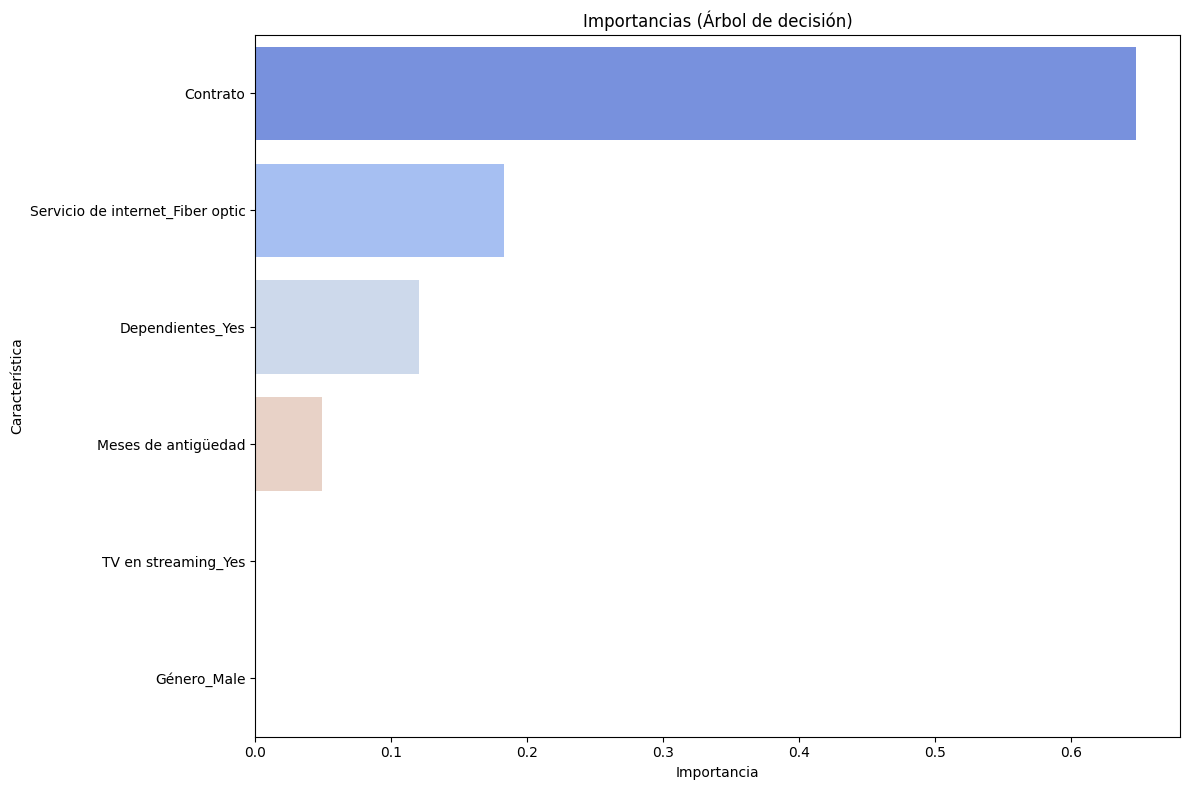

In [34]:
# Obtener nombres de las columnas 
onehot_feature_names = transformador.named_transformers_['onehot'].get_feature_names_out(onehot_columns)
feature_names_encoded = list(onehot_feature_names) + ordinal_columns + numerical_columns

# Crear DataFrame de importancias
importancia_df = pd.DataFrame({
    'Característica': feature_names_encoded,
    'Importancia': tree.feature_importances_
}).sort_values(by='Importancia', ascending=False)

# Graficar la importancia
plt.figure(figsize=(12, 8))
sns.barplot(data=importancia_df.head(6), x='Importancia', y='Característica',palette='coolwarm')
plt.title('Importancias (Árbol de decisión)')
plt.tight_layout()
plt.show()


La gráfica de importancias muestra que las estrategias de retención podrían enfocarse principalmente en:

- El contrato de los clientes.
- Clientes con fibra óptica.
- Nuevos usuarios sin dependientes.

In [35]:
# Ahora exportamos las 3 reglas más importantes

reglas_tree = pd.Series(tree.feature_importances_, index = feature_names_encoded).sort_values(ascending=False).head(3)
reglas_tree.round(2)

Contrato                            0.65
Servicio de internet_Fiber optic    0.18
Dependientes_Yes                    0.12
dtype: float64

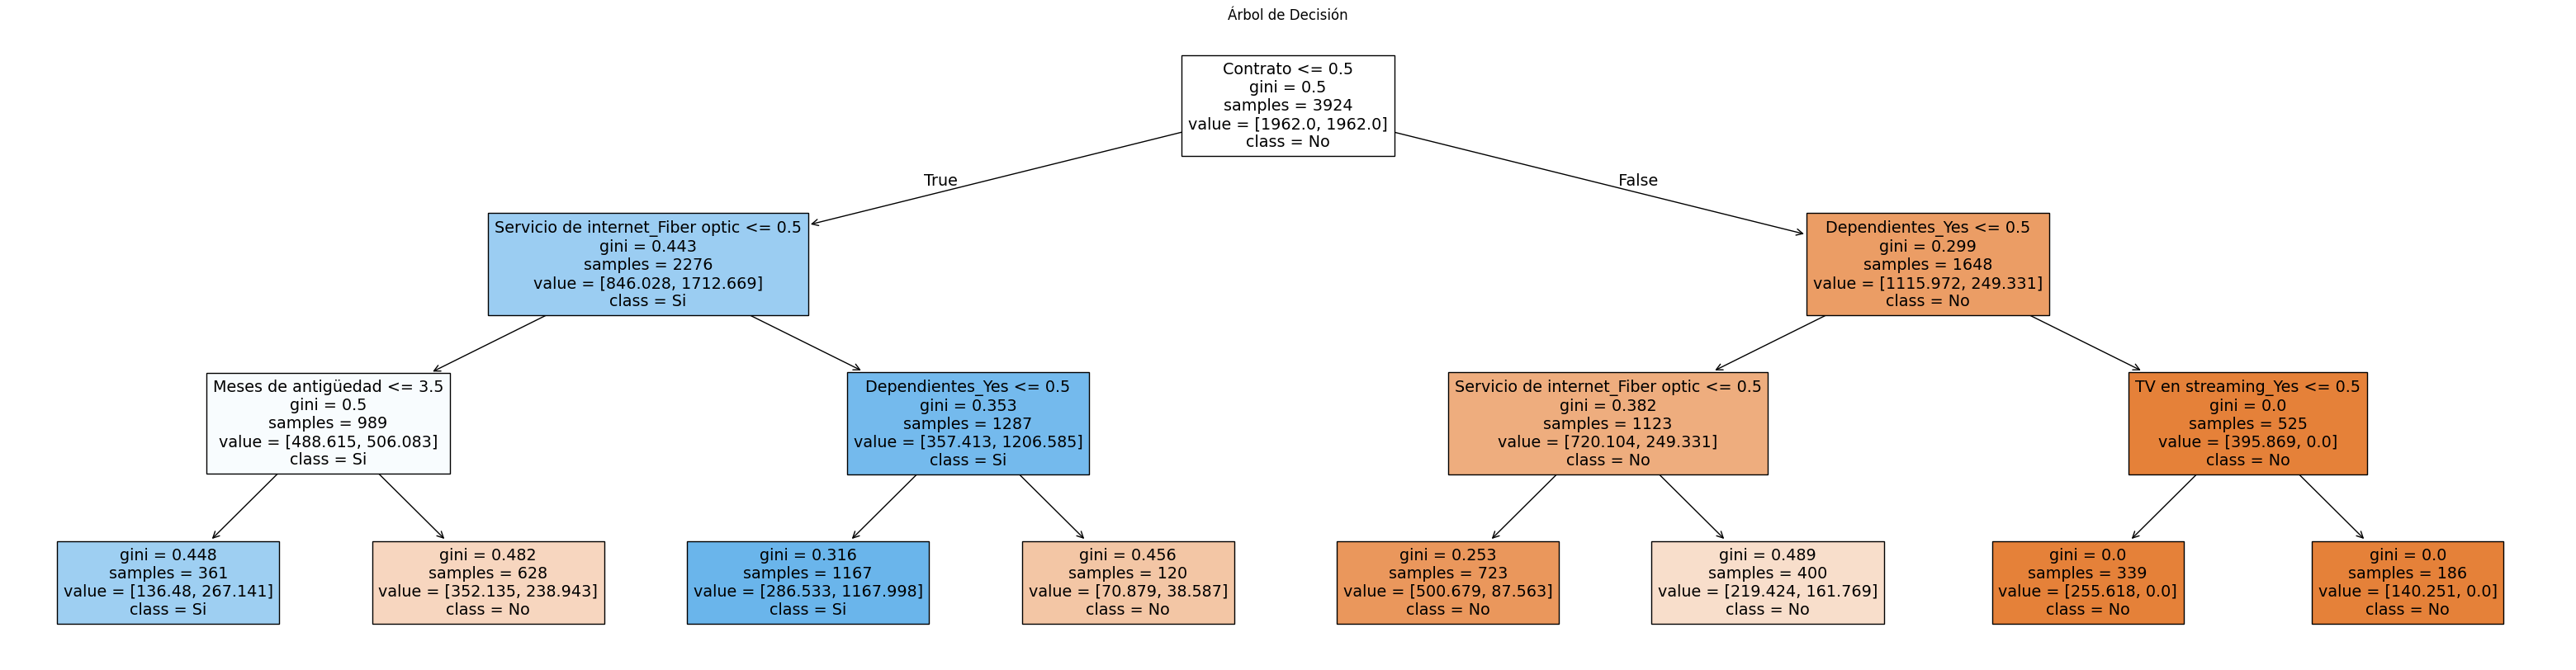

In [36]:
# Visualizar el árbol usando plot_tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(40,10))
plot_tree(tree, feature_names=feature_names_encoded, class_names=['No', 'Si'], filled=True)
plt.title("Árbol de Decisión")
plt.show()

**Principales Conclusiones (combinando ambos gráficos):** "Contrato" es, con diferencia, la Característica Más Importante:

- **Evidencia del gráfico:** Tiene la barra de importancia más larga, superando significativamente a todas las demás características (con una importancia cercana a 0.65).
- **Evidencia del árbol:** Es la variable en el nodo raíz, lo que significa que el primer y más grande split de los datos se basa en esta característica. Esto confirma su papel fundamental en la clasificación.
Implicación: El tipo de contrato del cliente es, por lejos, el factor más determinante en la decisión del modelo. Cualquier estrategia o análisis podría comenzar por entender profundamente las implicaciones de los diferentes tipos de contrato.


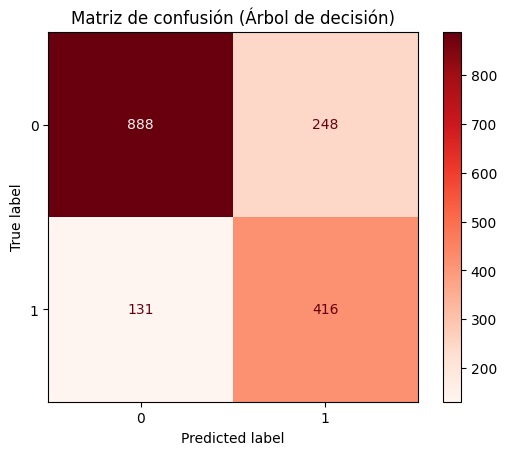

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Graficar la matriz de confusión
cm_tree = confusion_matrix(y_test,y_test_pred_tree)
tree_matrix = ConfusionMatrixDisplay(cm_tree)
tree_matrix.plot(cmap=plt.cm.Reds)
plt.title("Matriz de confusión (Árbol de decisión)")
plt.show()

**Conclusión:** Matriz de confusión 
- El árbol de decisión tiene mejor precisión al identificar a los clientes que se quedaron (clase 0), pero pierde más casos de los que se fueron (clase 1), con 131 falsos negativos. Es un modelo más simple pero menos efectivo para detectar deserciones, lo cual puede ser crítico en un problema de abandono.

In [38]:
from sklearn.metrics import classification_report

# Mostrar el reporte de métricas
print("---- Métricas de evaluación DT ----\n")
print(classification_report(y_test, y_test_pred_tree, target_names=["No abandonan", "Abandonan"]))

---- Métricas de evaluación DT ----

              precision    recall  f1-score   support

No abandonan       0.87      0.78      0.82      1136
   Abandonan       0.63      0.76      0.69       547

    accuracy                           0.77      1683
   macro avg       0.75      0.77      0.76      1683
weighted avg       0.79      0.77      0.78      1683



🌳🌳🌳 **Random Forest**

In [39]:
# Importar random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 40, max_depth = 5, class_weight='balanced', random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=40,
                       random_state=0)

In [40]:
# Calculo de las predicciones en Train y Test
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [41]:
# Calculo de métricas

# En Train
train_accuracy_rf = round(accuracy_score(y_train, y_train_pred_rf), 2)

# En Test
test_accuracy_rf = round(accuracy_score(y_test, y_test_pred_rf), 2)

# Mostrar métrica:
print('El accuracy en train es:', train_accuracy_rf)
print('El accuracy en test es:', test_accuracy_rf)


El accuracy en train es: 0.78
El accuracy en test es: 0.76


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8416\1614408565.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia_df, x='Importancia', y='Característica', palette='coolwarm')


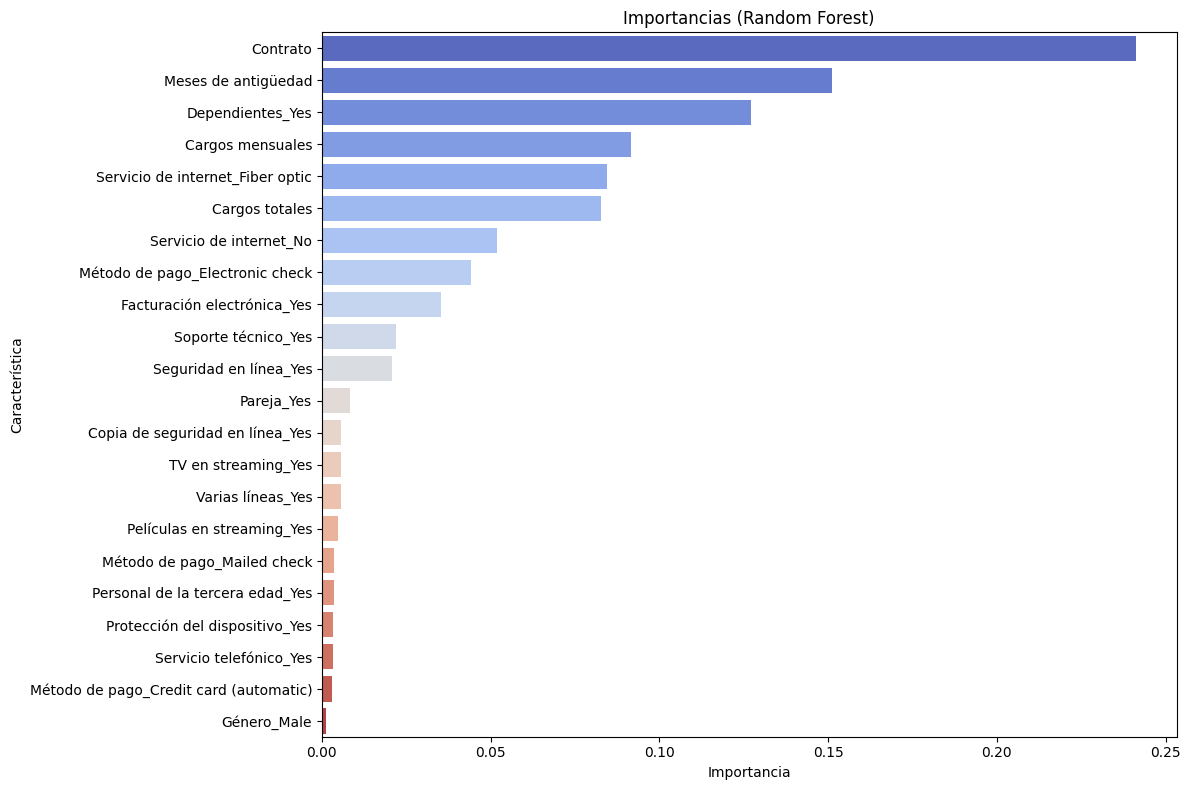

In [42]:
# Graficar importancias de features para Random Forest

# Crear DataFrame de importancias
importancia_df = pd.DataFrame({
    'Característica': feature_names_encoded,
    'Importancia': rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

# Graficar la importancia
plt.figure(figsize=(12, 8))
sns.barplot(data=importancia_df, x='Importancia', y='Característica', palette='coolwarm')
plt.title('Importancias (Random Forest)')
plt.tight_layout()
plt.show()

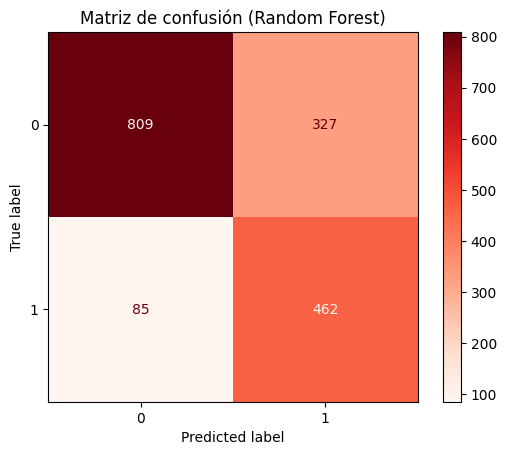

In [43]:
# Graficar la matriz de confusión
cm_rf = confusion_matrix(y_test,y_test_pred_rf)
rf_matrix = ConfusionMatrixDisplay(cm_rf)
rf_matrix.plot(cmap=plt.cm.Reds)
plt.title("Matriz de confusión (Random Forest)")
plt.show()

**Conclusión:** Matriz de confusión
- El modelo Random Forest logra identificar correctamente a la mayoría de los clientes que sí se quedaron (clase 0) y tiene un buen desempeño detectando a quienes se fueron (clase 1), con 85 falsos negativos, que son menos que los 131 del árbol de decisión. Aunque comete más falsos positivos, logra una mejor detección de la clase minoritaria (clientes que se van).

In [44]:
from sklearn.metrics import classification_report

print("---- Métricas de evaluación RF ----\n")
print(classification_report(y_test, y_test_pred_rf, target_names=["No abandonan", "Abandonan"]))

---- Métricas de evaluación RF ----

              precision    recall  f1-score   support

No abandonan       0.90      0.71      0.80      1136
   Abandonan       0.59      0.84      0.69       547

    accuracy                           0.76      1683
   macro avg       0.75      0.78      0.74      1683
weighted avg       0.80      0.76      0.76      1683



### **Paso 6:** Probar los modelos con nuevos clientes

In [45]:
# Crear datos para 3 nuevos clientes
nuevos_clientes = pd.DataFrame({
    'Género': ['Male', 'Female', 'Female'],
    'Personal de la tercera edad': ['No', 'Yes', 'No'],
    'Pareja': ['Yes', 'No', 'Yes'],
    'Dependientes': ['No', 'No', 'Yes'],
    'Meses de antigüedad': [12, 48, 3],
    'Servicio telefónico': ['Yes', 'Yes', 'Yes'],
    'Varias líneas': ['No', 'Yes', 'No'],
    'Servicio de internet': ['Fiber optic', 'DSL', 'Fiber optic'],
    'Seguridad en línea': ['No', 'Yes', 'No'],
    'Copia de seguridad en línea': ['No', 'Yes', 'No'],
    'Protección del dispositivo': ['No', 'Yes', 'No'],
    'Soporte técnico': ['No', 'Yes', 'No'],
    'TV en streaming': ['Yes', 'No', 'No'],
    'Películas en streaming': ['Yes', 'No', 'No'],
    'Contrato': ['Month-to-month', 'Two year', 'Month-to-month'],
    'Facturación electrónica': ['Yes', 'No', 'Yes'],
    'Método de pago': ['Electronic check', 'Credit card (automatic)', 'Bank transfer (automatic)'],
    'Cargos mensuales': [89.70, 49.99, 99.50],
    'Cargos totales': [1076.4, 2399.52, 298.5]
})

# Aplicar el transformador ya entrenado
nuevos_clientes_encoded = transformador.transform(nuevos_clientes)

# Árbol de decisión
pred_tree = tree.predict(nuevos_clientes_encoded)
print("Predicción Árbol de Decisión:", pred_tree)

# Random Forest
pred_rf = rf.predict(nuevos_clientes_encoded)
print("Predicción Random Forest:", pred_rf)

for i, (p_tree, p_rf) in enumerate(zip(pred_tree, pred_rf), start=1):
    print(f"\nCliente {i}:")
    print(f" - Árbol de Decisión: {'Abandona' if p_tree == 1 else 'Permanece'}")
    print(f" - Random Forest: {'Abandona' if p_rf == 1 else 'Permanece'}")

Predicción Árbol de Decisión: [1 0 0]
Predicción Random Forest: [1 0 1]

Cliente 1:
 - Árbol de Decisión: Abandona
 - Random Forest: Abandona

Cliente 2:
 - Árbol de Decisión: Permanece
 - Random Forest: Permanece

Cliente 3:
 - Árbol de Decisión: Permanece
 - Random Forest: Abandona


**Conclusiones finales:** 
- **Modelo más efieciente**: Dado que en problemas de abandono el Recall (detectar a los que abandonan) suele ser una métrica muy importante (porque queremos identificar y retener a los clientes que se van), el Random Forest podría ser considerado ligeramente más eficiente en este escenario. Es más "sensible" a los clientes que abandonan, lo que es valioso para la estrategia de retención.
- **Variables más importantes a la hora de predecir**: Ambos modelos confirman que el tipo de contrato es el factor más crucial. Después, el tipo de servicio de internet (especialmente fibra óptica) y la antigüedad del cliente, junto con si tienen dependientes, son los siguientes factores más influyentes. Los cargos mensuales también son relevantes según el Árbol de Decisión. Las características demográficas como el género parecen no ser importantes para predecir el abandono.